<a href="https://colab.research.google.com/github/Swarn36/Finance_Related/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capital Asset Pricing Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

RISK_FREE_RATE = .05
MONTHS_IN_YEAR = 12


class CAPM:

    def __init__(self, stocks, start_date, end_date):
        self.stock_data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        stock_data = {}

        for stock in self.stocks:
            ticker = yf.download(stock, self.start_date, self.end_date)
            stock_data[stock] = ticker['Adj Close']

        return pd.DataFrame(stock_data)

    def initialize(self):
        stock_data = self.download_data()
        stock_data = stock_data.resample('M').last()

        self.stock_data = pd.DataFrame({'s_adjclose': stock_data[self.stocks[0]], 'm_adjclose': stock_data[self.stocks[1]]})
        print(self.stock_data)

        #logarithmic monthly return
        self.stock_data[['s_returns', 'm_returns']] = np.log(self.stock_data[['s_adjclose', 'm_adjclose']] / self.stock_data[['s_adjclose', 'm_adjclose']].shift(1))

        self.stock_data = self.stock_data[1:]
        print(self.stock_data)

    def calculate_beta(self):
        covariance_matrix = np.cov(self.stock_data['s_returns'], self.stock_data['m_returns'])
        beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]

        print(f"Beta from formula: {beta}")

    def regression(self):
        beta, alpha = np.polyfit(self.stock_data['m_returns'], self.stock_data['s_returns'], deg=1)
        print(f"Beta from regression: {beta}")
        expected_returns = RISK_FREE_RATE + beta * (self.stock_data['m_returns'].mean() * MONTHS_IN_YEAR - RISK_FREE_RATE)

        print(f"Expected Return: {expected_returns}")
        self.plot_regression(alpha, beta)

    def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize=(20, 10))
        axis.scatter(self.stock_data['m_returns'], self.stock_data['s_returns'], label='Data Points')
        axis.plot(self.stock_data['m_returns'], alpha + beta * self.stock_data['m_returns'] , color='blue', label='CAPM Line')
        plt.title('CAPM')
        plt.xlabel('Market Return $R_m$', fontsize=18)
        plt.ylabel('Stock Return $R_a$', fontsize=18)
        plt.text(0.08, 0.05, r'$R_a = \alpha + \beta * R_m$', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.show()

Output section

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            s_adjclose   m_adjclose
Date                               
2015-01-31   63.114285  1994.989990
2015-02-28   67.844284  2104.500000
2015-03-31   59.527142  2067.889893
2015-04-30   79.500000  2085.510010
2015-05-31   89.151428  2107.389893
...                ...          ...
2022-08-31  223.559998  3955.000000
2022-09-30  235.440002  3585.620117
2022-10-31  291.880005  3871.979980
2022-11-30  305.529999  4080.110107
2022-12-31  294.880005  3839.500000

[96 rows x 2 columns]
            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2015-02-28   67.844284  2104.500000   0.072268   0.053439
2015-03-31   59.527142  2067.889893  -0.130783  -0.017549
2015-04-30   79.500000  2085.510010   0.289325   0.008485
2015-05-31   89.151428  2107.389893   0.114579   0.010437
2015-06-30   93.848572 

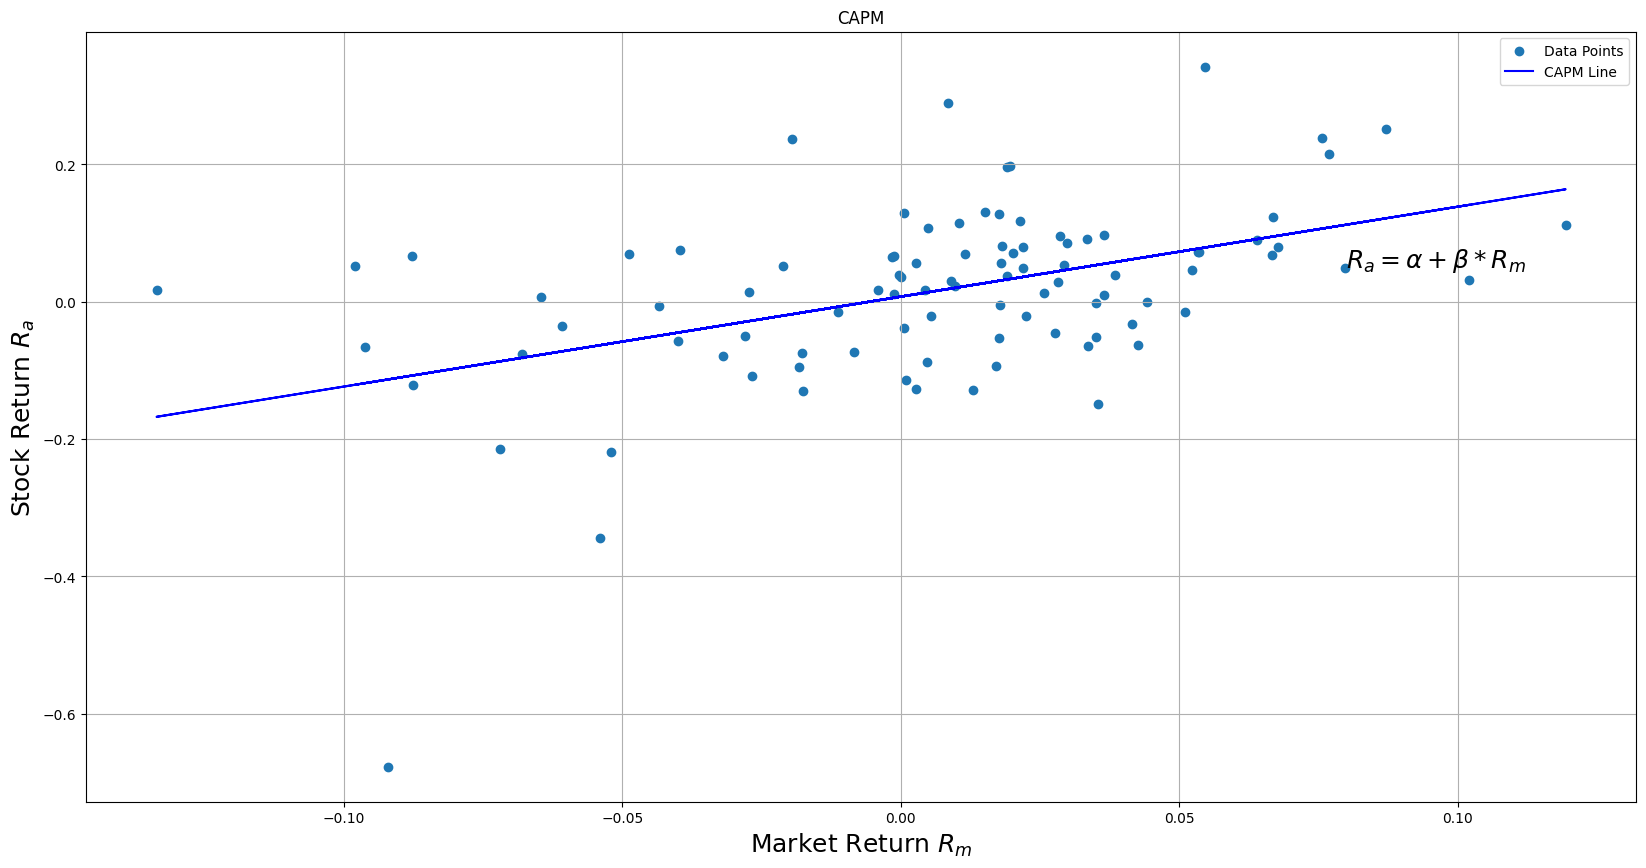

In [2]:
if __name__ == '__main__':

  capm = CAPM(['NFLX', '^GSPC'], '2015-01-01', '2023-01-01')
  capm.initialize()
  capm.calculate_beta()
  capm.regression()